In [19]:
%matplotlib inline

In [20]:
import numpy as np
import pandas as pd


In [21]:
pip install blimpy

In [22]:
import pylab as plt
from blimpy import Waterfall

Reference- https://github.com/UCBerkeleySETI/breakthrough/blob/master/GBT/voyager/voyager.ipynb

Class for handling and plotting waterfall data from radio telescope observations (e.g., .fil or .h5 files)Class for handling and plotting waterfall data from radio telescope observations (e.g., .fil or .h5 files)

In [31]:
gn = Waterfall('voyager_f1032192_t300_v2.fil')
gn.info()


--- File Info ---
     rawdatafile : ./blc3_2bit_guppi_57386_VOYAGER1_0004.0000.raw
     source_name :                         VOYAGER1
      machine_id :                               20
    telescope_id :                                6
         src_raj :                     17:11:58.728
         src_dej :                      11:56:57.48
        az_start :                              0.0
        za_start :                              0.0
       data_type :                                1
            fch1 :            8588.964842330843 MHz
            foff :       -2.838316417875744e-06 MHz
          nchans :                         66060288
          nbeams :                                1
           ibeam :                                1
           nbits :                               32
   tstart (ISOT) :          2015-12-30T20:45:28.000
    tstart (MJD) :               57386.864907407406
           tsamp :                      105.6964608
            nifs :             

Header file related is in pg 4- https://sigproc.sourceforge.net/sigproc.pdf

Plot the mean power spectrum (frequency vs. power) of the loaded observation data.
self.freqs (in MHz)vs
Mean power across time (or beam) samples

In [32]:
print(gn.header)
print(gn.data.shape)



{'rawdatafile': './blc3_2bit_guppi_57386_VOYAGER1_0004.0000.raw', 'source_name': 'VOYAGER1', 'machine_id': 20, 'telescope_id': 6, 'src_raj': <Angle 17.19964667 hourangle>, 'src_dej': <Angle 11.9493 deg>, 'az_start': 0.0, 'za_start': 0.0, 'data_type': 1, 'fch1': 8588.964842330843, 'foff': -2.838316417875744e-06, 'nchans': 66060288, 'nbeams': 1, 'ibeam': 1, 'nbits': 32, 'tstart': 57386.864907407406, 'tsamp': 105.6964608, 'nifs': 1}
(1, 1, 66060288)


Here (1, 1, 66060288) data shape in blimpy(different from numpy python), first axis iis about integration time, second axis polarisation/ IF, third axis number of channel- bins

In [33]:
gn.plot_spectrum()
# This method is applicatable if it has more than integraton time- 2D

extracting integration 0...


IndexError: tuple index out of range

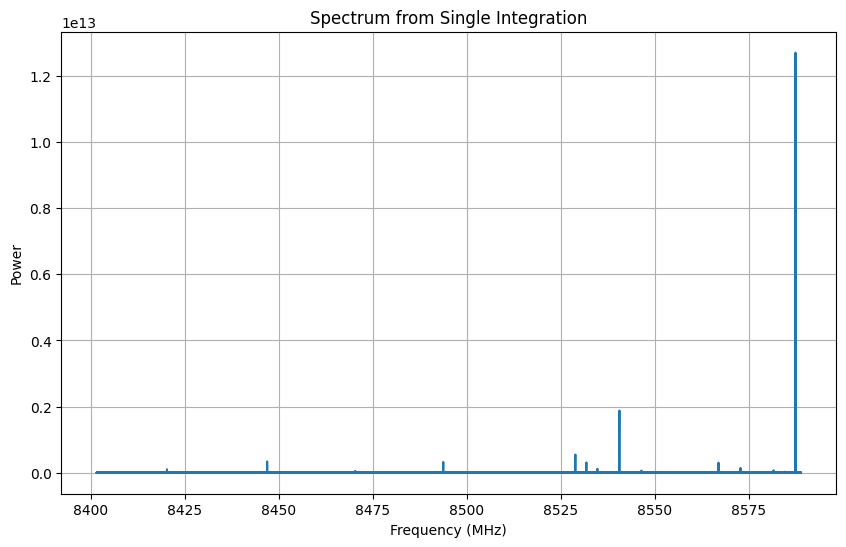

In [38]:
spectrum = gn.data[0, 0]
freqs = gn.freqs

plt.figure(figsize=(10, 6))
plt.plot(freqs, spectrum)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power")
plt.title("Spectrum from Single Integration")
plt.grid(True)
plt.show()

Zoomed for 2D data is obs.plot_spectrum(f_start=8420.18, f_stop=8420.25)


Manual code for start and stop frequency- Note that the header values are not directly used. It uses zoom frequencies (~8420.2 MHz) where Voyager’s signal is expected.

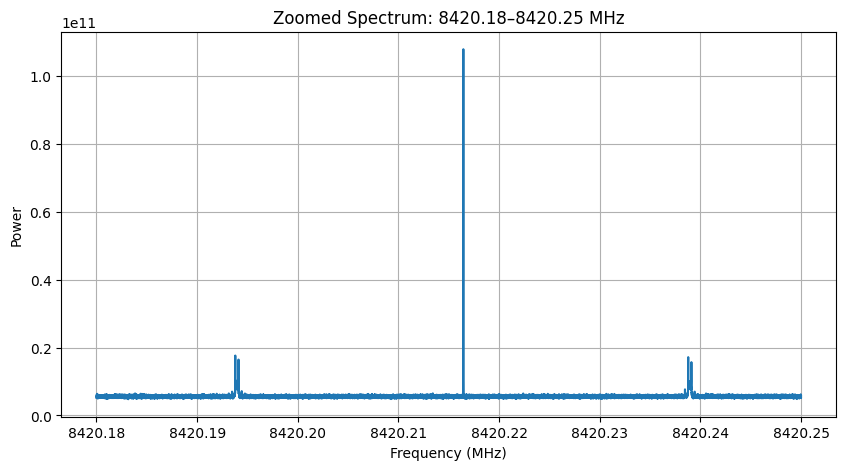

In [40]:
spectrum = gn.data[0, 0]
freqs = gn.freqs
mask = (freqs >= 8420.18) & (freqs <= 8420.25)
zoomed_freqs = freqs[mask]
zoomed_spectrum = spectrum[mask]


plt.figure(figsize=(10, 5))
plt.plot(zoomed_freqs, zoomed_spectrum)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power")
plt.title("Zoomed Spectrum: 8420.18–8420.25 MHz")
plt.grid(True)
plt.show()

It has  carrier (center) and two sidebands that carry the data. Next zooming into features

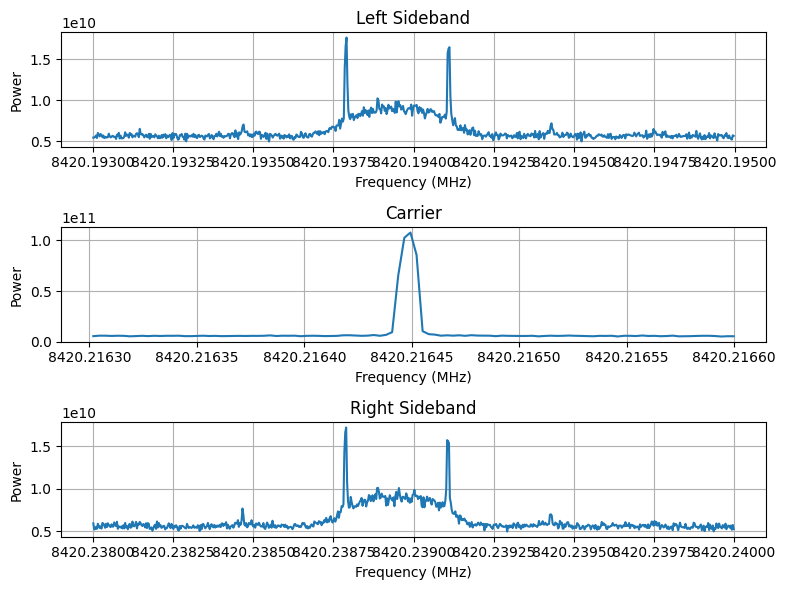

In [41]:
bands = [
    ("Left Sideband", 8420.193, 8420.195),
    ("Carrier",       8420.2163, 8420.2166),
    ("Right Sideband",8420.238,  8420.240)
]

plt.figure(figsize=(8, 6))
for i, (label, f_start, f_stop) in enumerate(bands, 1):
    plt.subplot(3, 1, i)
    mask = (freqs >= f_start) & (freqs <= f_stop)
    plt.plot(freqs[mask], spectrum[mask])
    plt.title(label)
    plt.xlabel("Frequency (MHz)")
    plt.ylabel("Power")
    plt.grid(True)

plt.tight_layout()
plt.show()

Tutorials- https://github.com/UCBerkeleySETI/breakthrough/tree/master/GBT/filterbank_tutorial